In [1]:
# importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

In [2]:
# converting csv file into pandas dataframe
raw_data=pd.read_csv('data.csv')

In [3]:
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
raw_data.shape

(569, 33)

In [5]:
# there are 33 columns in this data set
raw_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
# removing unnecessary columns
raw_data=raw_data.drop([raw_data.columns[0],raw_data.columns[-1]],axis=1)

In [7]:
raw_data.shape

(569, 31)

In [8]:
raw_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# dignosis is the end result we want to predict
# converting data of this columns into numerical values
# becoz algorithms can't work on strings
# => Benign(B) = 0
# => Malignant(M) = 1
raw_data['diagnosis'].replace(to_replace=['B','M'],value=[0,1],inplace=True)

In [10]:
# function that help in converting columnwise data into there cumulative data
# after this data in a column has a range between 0 and 1
def relative(n,l):
    s=0
    for i in l:
        s+=i
    return n/s

In [11]:
# code that actually converts raw data into relative data
# it take data individually from every cell and call relative function
# that returns its relative frequency that is to added to a dictionary and with every iteration dictionary is added to a list
# which is at last conveted into a new dataframe called relative data
d=[]
for i in range(raw_data.shape[0]):
    dd={}
    for k in range(raw_data.shape[1]):
        if k==0:
            dd[raw_data.columns[k]]=raw_data.iloc[i,k]
        else:
            dd[raw_data.columns[k]]=relative(raw_data.iloc[i,k],list(raw_data.iloc[:,k]))
    d.append(dd)
relative_data=pd.DataFrame(d)

In [12]:
relative_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.002238,0.000946,0.002347,0.002686,0.002159,0.004676,0.005939,0.005285,0.002347,...,0.002742,0.001186,0.003025,0.004030,0.002154,0.004601,0.004597,0.004070,0.002788,0.002489
1,1,0.002559,0.001619,0.002540,0.003558,0.001546,0.001325,0.001720,0.002521,0.001758,...,0.002700,0.001602,0.002602,0.003904,0.001644,0.001290,0.001560,0.002852,0.001666,0.001864
2,1,0.002449,0.001936,0.002484,0.003228,0.001999,0.002693,0.003907,0.004595,0.002007,...,0.002546,0.001747,0.002499,0.003411,0.001917,0.002934,0.002908,0.003726,0.002189,0.001834
3,1,0.001421,0.001857,0.001483,0.001036,0.002599,0.004782,0.004778,0.003779,0.002519,...,0.001611,0.001814,0.001620,0.001133,0.002786,0.005988,0.004435,0.003949,0.004022,0.003622
4,1,0.002524,0.001307,0.002582,0.003481,0.001829,0.002237,0.003919,0.003747,0.001755,...,0.002435,0.001141,0.002494,0.003143,0.001824,0.001417,0.002583,0.002492,0.001432,0.001607


In [13]:
# as u can see that sum of individual comlumn is apporx. 1
sum=[]
for i in range(relative_data.shape[1]):
    s=0
    for j in relative_data.iloc[:,i]:
        s+=j
    sum.append(s)
sum

[212,
 0.9999999999999993,
 0.9999999999999984,
 0.9999999999999994,
 0.9999999999999989,
 1.0000000000000013,
 0.9999999999999993,
 1.0000000000000007,
 1.0000000000000013,
 0.9999999999999991,
 1.0000000000000027,
 0.9999999999999996,
 0.9999999999999999,
 1.000000000000001,
 0.9999999999999997,
 0.9999999999999997,
 0.9999999999999983,
 1.0000000000000009,
 0.9999999999999992,
 1.0000000000000002,
 0.9999999999999999,
 0.9999999999999991,
 1.0000000000000007,
 0.9999999999999987,
 0.9999999999999998,
 0.9999999999999984,
 0.9999999999999973,
 1.0000000000000016,
 1.0,
 0.9999999999999997,
 1.0000000000000018]

In [14]:
# this peace of code divides data into 2 parts
# 1. for benign tumour
# 2. for malignant tumour
# and create there seprate dataframe for each
# but each dataframe has same dimensions as previous
# this is done for further calculation of best top 2 features to train model which will definatly increase accuracy
m=[]
b=[]
for i in range(relative_data.shape[0]):
    if relative_data[relative_data.columns[0]][i]==0:
        m.append({relative_data.columns[k]:list(relative_data.iloc[i,:])[k] for k in range(relative_data.shape[1])})
        b.append({relative_data.columns[k]:(0 if k==0 else -0.0000000001) for k in range(relative_data.shape[1]) })
    if relative_data[relative_data.columns[0]][i]==1:
        b.append({relative_data.columns[k]:list(relative_data.iloc[i,:])[k] for k in range(relative_data.shape[1])})
        m.append({relative_data.columns[k]:(1 if k==0 else -0.0000000001) for k in range(relative_data.shape[1])})
malignant_data=pd.DataFrame(m)
benign_data=pd.DataFrame(b)

In [15]:
malignant_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,...,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10
1,1.0,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,...,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10
2,1.0,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,...,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10
3,1.0,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,...,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10
4,1.0,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,...,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,...,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10
565,1.0,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,...,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10
566,1.0,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,...,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10
567,1.0,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,...,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10


In [16]:
benign_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,2.237999e-03,9.457161e-04,2.346629e-03,2.686297e-03,2.159441e-03,4.675761e-03,5.939421e-03,5.284715e-03,2.346696e-03,...,2.741659e-03,1.186146e-03,3.024661e-03,4.029523e-03,2.153543e-03,4.600599e-03,4.596603e-03,4.069869e-03,2.787589e-03,2.489262e-03
1,1.0,2.558958e-03,1.619015e-03,2.539634e-03,3.558472e-03,1.545532e-03,1.324574e-03,1.719879e-03,2.520927e-03,1.757839e-03,...,2.699529e-03,1.602290e-03,2.601930e-03,3.903788e-03,1.643703e-03,1.289771e-03,1.559965e-03,2.852282e-03,1.666131e-03,1.863701e-03
2,1.0,2.449484e-03,1.936076e-03,2.484217e-03,3.228387e-03,1.998942e-03,2.693279e-03,3.906837e-03,4.594935e-03,2.007157e-03,...,2.546135e-03,1.747393e-03,2.498704e-03,3.410825e-03,1.917211e-03,2.934126e-03,2.908147e-03,3.726369e-03,2.188994e-03,1.833554e-03
3,1.0,1.420676e-03,1.856811e-03,1.482504e-03,1.036143e-03,2.598990e-03,4.781875e-03,4.777662e-03,3.779415e-03,2.519376e-03,...,1.610644e-03,1.813784e-03,1.619980e-03,1.133017e-03,2.785533e-03,5.987829e-03,4.435183e-03,3.948724e-03,4.021738e-03,3.621886e-03
4,1.0,2.524125e-03,1.306509e-03,2.581674e-03,3.480647e-03,1.829324e-03,2.236819e-03,3.918712e-03,3.747082e-03,1.754929e-03,...,2.434870e-03,1.140973e-03,2.493789e-03,3.143388e-03,1.824272e-03,1.416951e-03,2.582724e-03,2.491913e-03,1.432267e-03,1.607447e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,2.682116e-03,2.039941e-03,2.713529e-03,3.969064e-03,2.024476e-03,1.952164e-03,4.827140e-03,4.990121e-03,1.674410e-03,...,2.749221e-03,1.806939e-03,2.721540e-03,4.045490e-03,1.872069e-03,1.460497e-03,2.651812e-03,3.398203e-03,1.248084e-03,1.489579e-03
565,1.0,2.504221e-03,2.573842e-03,2.507148e-03,3.384037e-03,1.783728e-03,1.741620e-03,2.849972e-03,3.517515e-03,1.699633e-03,...,2.559098e-03,2.618009e-03,2.539667e-03,3.454733e-03,1.548108e-03,1.328478e-03,2.075864e-03,2.496514e-03,1.558287e-03,1.389506e-03
566,1.0,2.065080e-03,2.558353e-03,2.069544e-03,2.302809e-03,1.542067e-03,1.723092e-03,1.830909e-03,1.904797e-03,1.542475e-03,...,2.050303e-03,2.335332e-03,2.075973e-03,2.243281e-03,1.512260e-03,2.138560e-03,2.197252e-03,2.174482e-03,1.343811e-03,1.637176e-03
567,1.0,2.562690e-03,2.672240e-03,2.677221e-03,3.394771e-03,2.148498e-03,4.665654e-03,6.954724e-03,5.460752e-03,2.325354e-03,...,2.780548e-03,2.698089e-03,3.024661e-03,3.634355e-03,2.190719e-03,6.000271e-03,6.061007e-03,4.063735e-03,2.476174e-03,2.596034e-03


In [17]:
# mean function data ignores the blank data
def mean(n):
    sum=0
    count=0
    for i in n:
        if i>=0:
            sum+=i
            count+=1
    return sum/count

['radius_mean', 0.0006613613654055336]


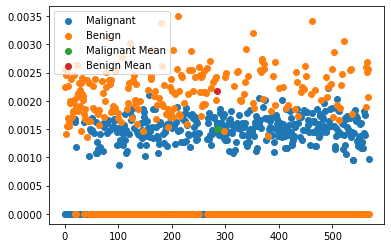

['texture_mean', 0.0003362069638245763]


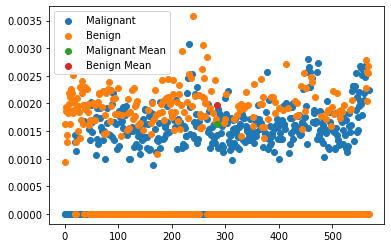

['perimeter_mean', 0.0007125874338391111]


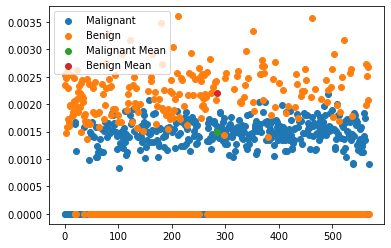

['area_mean', 0.0013836341414031057]


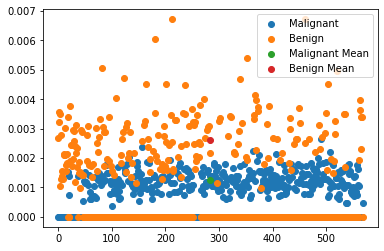

['smoothness_mean', 0.0001900607982493628]


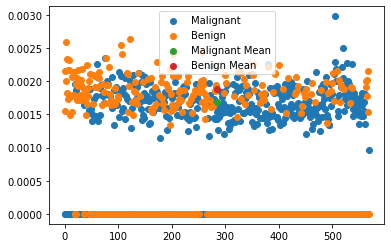

['compactness_mean', 0.0010965662664443835]


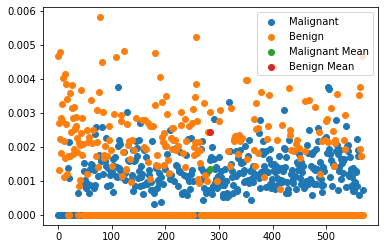

['concavity_mean', 0.0022704202854570586]


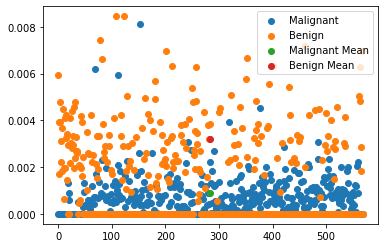

['concave points_mean', 0.002237205218637197]


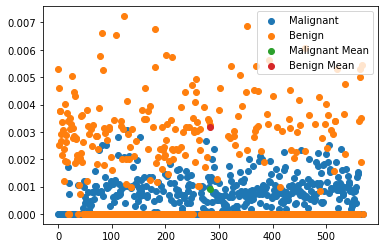

['symmetry_mean', 0.0001816333728141403]


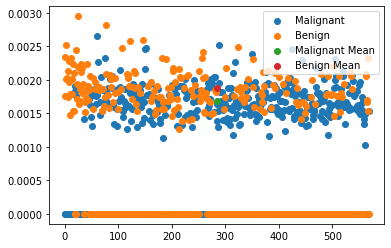

['fractal_dimension_mean', 5.2418408444847645e-06]


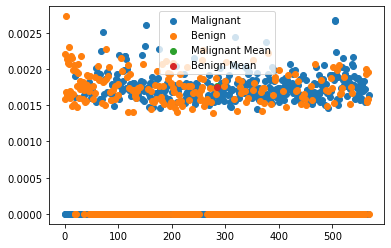

['radius_se', 0.0014097167782162652]


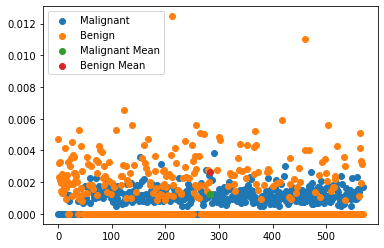

['texture_se', 1.367075618020257e-05]


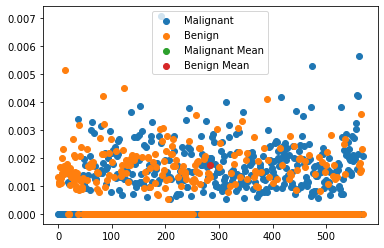

['perimeter_se', 0.001424837798793563]


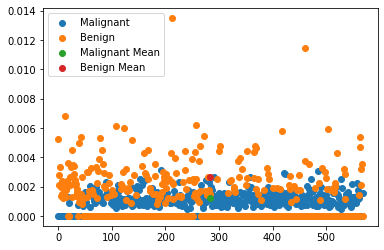

['area_se', 0.002245456203518068]


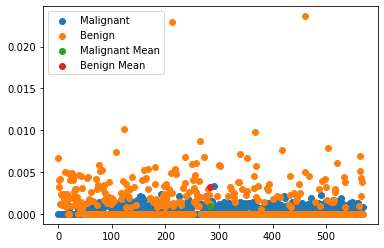

['smoothness_se', 0.00010378799809442692]


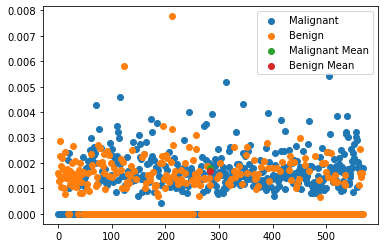

['compactness_se', 0.0007479390888774072]


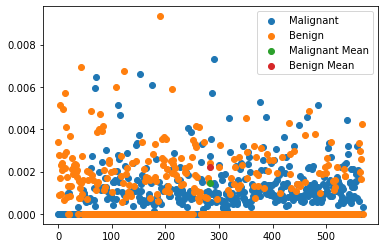

['concavity_se', 0.0008721450560663559]


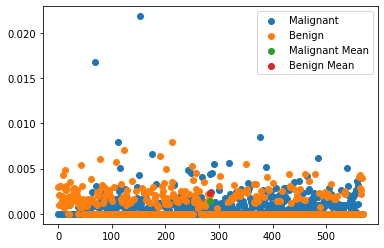

['concave points_se', 0.0007751515921849816]


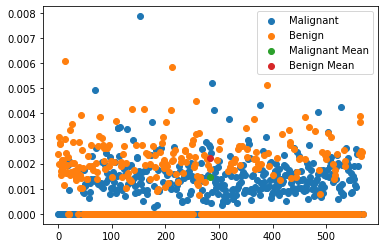

['symmetry_se', 9.531174331435261e-06]


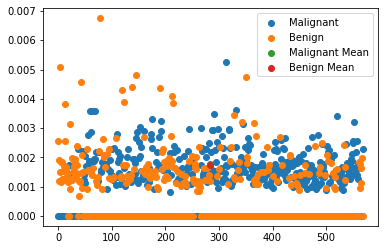

['fractal_dimension_se', 0.00019745025732324393]


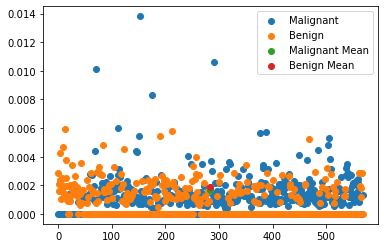

['radius_worst', 0.0008377302175542577]


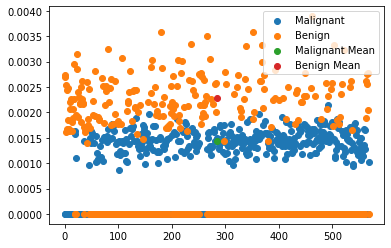

['texture_worst', 0.00039719387222738093]


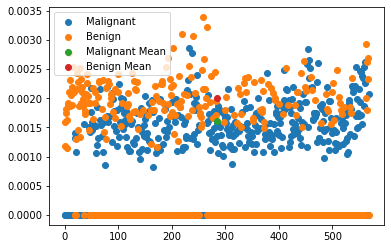

['perimeter_worst', 0.0008907576581737887]


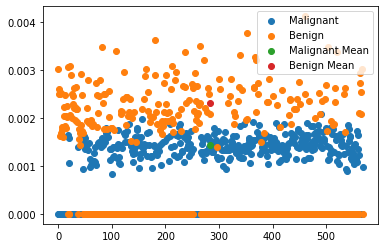

['area_worst', 0.0017231489458351544]


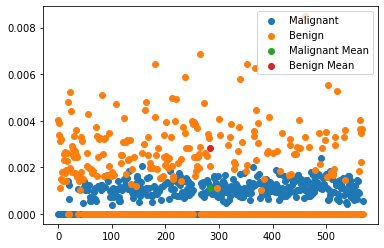

['smoothness_worst', 0.0002640246864946303]


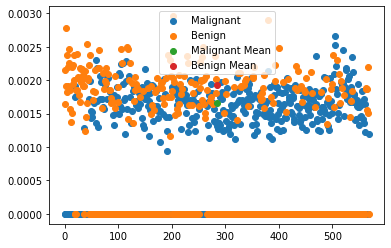

['compactness_worst', 0.001328143430546864]


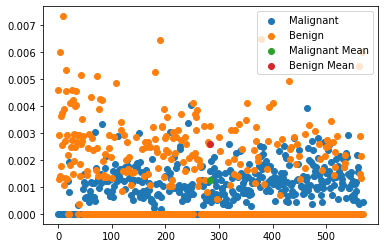

['concavity_worst', 0.0018361090545906341]


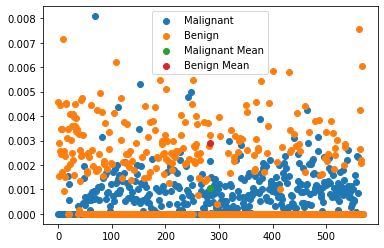

['concave points_worst', 0.0016529889789957115]


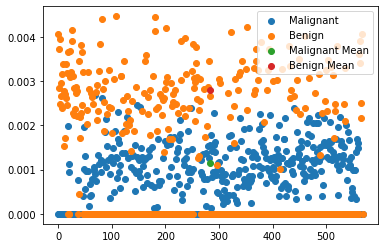

['symmetry_worst', 0.00032245391572980784]


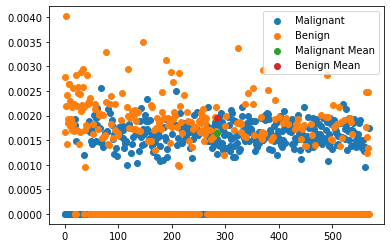

['fractal_dimension_worst', 0.0002530689203253547]


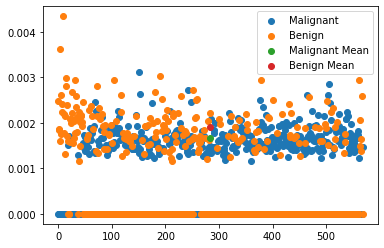

In [18]:
# code that compares each and every features of malignant tumour and benign tumour
# that take mean of every cluster and find the distance between the mean of each cluster
# the feature with highest distance between mean of malignant tumour and benign tumour
# is been selected to be the best feature for training
distance=[]
for i in relative_data:
    if i!='diagnosis':
        d=(((mean(list(np.arange(malignant_data.shape[0])))-mean(list(np.arange(benign_data.shape[0]))))**2)+((mean(list(malignant_data[i]))-mean(list(benign_data[i])))**2))**0.5
        print([i,d])
        distance.append([i,d])
        plt.scatter(list(np.arange(malignant_data.shape[0])),list(malignant_data[i]))
        plt.scatter(list(np.arange(benign_data.shape[0])),list(benign_data[i]))
        plt.scatter(mean(list(np.arange(malignant_data.shape[0]))),mean(list(malignant_data[i])))
        plt.scatter(mean(list(np.arange(benign_data.shape[0]))),mean(list(benign_data[i])))
        plt.legend(['Malignant','Benign','Malignant Mean','Benign Mean'])
        plt.show()

In [19]:
# code two find out top 2 feature
max=['',0]
max2=['',0]
for i in distance:
    if i[1]>max[1]:
        max2=max
        max=i
print(max,max2)

['concavity_mean', 0.0022704202854570586] ['area_mean', 0.0013836341414031057]


In [20]:
# data with top 2 features which are selected
main_data=relative_data.iloc[:,[0,4,7]]

In [21]:
main_data.head()

,diagnosis,area_mean,concavity_mean
0,1,0.002686,0.005939
1,1,0.003558,0.001720
2,1,0.003228,0.003907
3,1,0.001036,0.004778
4,1,0.003481,0.003919


In [22]:
# Further we can train Modals to predict cancar toumor and do analysis by makeing confusion matrix
# which will give us:-
# 1. Accuracy
# 2. Recall 
# 3. Precision
# 4. F1 Score